In [78]:
# %run JSP_GA.py
# %run JSP_TS.py
%run JSP_GATS.py

数据集：ft10
【理论最优值：930】【n=10;m=10】
第0代种群，Cmax=1141.0
第1代种群，Cmax=959.0
第2代种群，Cmax=959.0
第3代种群，Cmax=959.0
第4代种群，Cmax=959.0
第5代种群，Cmax=959.0


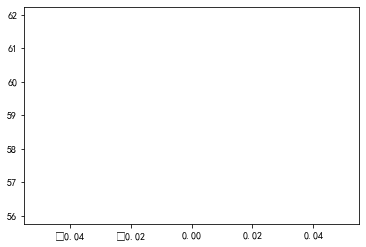

In [ ]:
plt.plot(C_history)
plt.show()

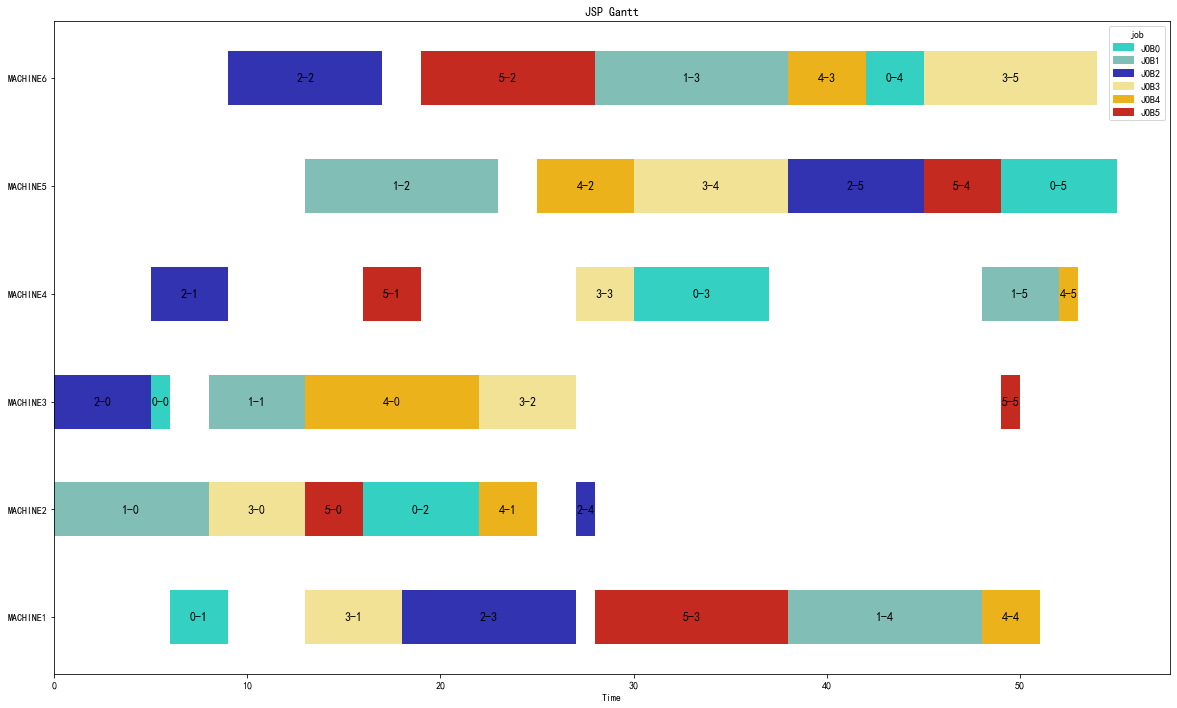

In [ ]:
# DrawGantt(ga.T_op)
DrawGantt(ts.T_op)
# print(flag)

In [ ]:
# from TS_function import *

# ts = TabuSearch(target, generation_total, generation_truncation)
# critical_path = ts.GetCriticalPath(ga.T_op, ga.C_op_max)
# for each in critical_path:
#     print(each)

In [ ]:
# neighbors = ts.Neighbors(critical_path, ga.T_op)
# for each in neighbors:
#     print(each)

In [ ]:
# T, C = ts.Perturb(neighbors[0], ga.T_op)
# print(C.max(initial=0))
# DrawGantt(T)